In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

### Import the IPL ball by ball data (2008-2021*)

In [2]:
df = pd.read_csv('ipl_ball_by_ball_data.csv')

In [3]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(200663, 22)

In [5]:
df.innings.unique()

array([1, 2, 4, 3, 5, 6], dtype=int64)

In [6]:
# Inning 3,4 represents 1st super over and 5,6 represents 2nd super over

### What are the numbers when ABD faces Bumrah?
#### step 1: Filter by player names 
#### step 2: Get the required columns

In [7]:
req_df = df[(df.striker == 'AB de Villiers') & (df.bowler == 'JJ Bumrah')]

In [8]:
req_df.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
95889,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.6,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95890,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.5,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95892,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.3,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
req_df.shape

(83, 22)

#### No of runs scored?
#### No of balls faced?
#### No of times dismissed?

In [10]:
# runs scored
sum(req_df.runs_off_bat)

120

In [11]:
# balls faced
len(req_df)

83

In [12]:
# outs
len(req_df[req_df.player_dismissed == 'AB de Villiers'])

2

In [42]:
# strike rate
round((100*sum(req_df.runs_off_bat)/len(req_df)),2)

144.58

### Comparison against all batsman Bumrah has bowled to

In [14]:
bumrah_df = df[df.bowler =='JJ Bumrah']

In [15]:
bumrah_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
76731,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,6.1,Royal Challengers Bangalore,Mumbai Indians,MA Agarwal,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,caught,MA Agarwal,NaN,NaN
76732,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,6.2,Royal Challengers Bangalore,Mumbai Indians,DT Christian,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76733,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,6.3,Royal Challengers Bangalore,Mumbai Indians,DT Christian,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76734,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,6.4,Royal Challengers Bangalore,Mumbai Indians,DT Christian,CH Gayle,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76735,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,6.5,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,DT Christian,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# runs scored by all batsmen vs bumrah
bdf1 = pd.DataFrame(bumrah_df.groupby('striker')['runs_off_bat'].sum()).reset_index()
bdf1.head()

,striker,runs_off_bat
0,A Mishra,1
1,AB de Villiers,120
2,AD Nath,4
3,AD Russell,51
4,AJ Finch,25


In [17]:
bdf2 = pd.DataFrame(bumrah_df.groupby('striker')['ball'].count()).reset_index()
bdf2.head()

,striker,ball
0,A Mishra,5
1,AB de Villiers,83
2,AD Nath,4
3,AD Russell,41
4,AJ Finch,33


In [18]:
bdf3 = bdf1.merge(bdf2, on = 'striker', how = 'left')
bdf3.head()

,striker,runs_off_bat,ball
0,A Mishra,1,5
1,AB de Villiers,120,83
2,AD Nath,4,4
3,AD Russell,51,41
4,AJ Finch,25,33


In [19]:
bdf3['strike_rate'] = round(100*bdf3['runs_off_bat']/bdf3['ball'],2)
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,A Mishra,1,5,20.00
1,AB de Villiers,120,83,144.58
2,AD Nath,4,4,100.00
3,AD Russell,51,41,124.39
4,AJ Finch,25,33,75.76


### Let's put min criteria: 20 balls

In [20]:
bdf3 = bdf3[bdf3.ball >= 20]
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
1,AB de Villiers,120,83,144.58
3,AD Russell,51,41,124.39
4,AJ Finch,25,33,75.76
7,AM Rahane,43,35,122.86
8,AR Patel,21,32,65.62


In [21]:
abd_df = df[df.striker =='AB de Villiers']
abd_df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
4574,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,14.6,Delhi Daredevils,Chennai Super Kings,AB de Villiers,S Dhawan,MS Gony,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4577,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,15.3,Delhi Daredevils,Chennai Super Kings,AB de Villiers,S Dhawan,M Ntini,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# runs scored by abd vs all bowlers
adf1 = pd.DataFrame(abd_df.groupby('bowler')['runs_off_bat'].sum()).reset_index()
adf1.head()

,bowler,runs_off_bat
0,A Ashish Reddy,46
1,A Chandila,26
2,A Flintoff,34
3,A Kumble,39
4,A Mishra,40


In [23]:
# balls faced by abd vs all bowlers
adf2 = pd.DataFrame(abd_df.groupby('bowler')['ball'].count()).reset_index()
adf2.head()

,bowler,ball
0,A Ashish Reddy,18
1,A Chandila,11
2,A Flintoff,12
3,A Kumble,41
4,A Mishra,37


In [24]:
adf3 = adf1.merge(adf2, on = 'bowler', how = 'left')
adf3.head()

,bowler,runs_off_bat,ball
0,A Ashish Reddy,46,18
1,A Chandila,26,11
2,A Flintoff,34,12
3,A Kumble,39,41
4,A Mishra,40,37


In [25]:
adf3['strike_rate'] = round(100*adf3['runs_off_bat']/adf3['ball'],2)
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
0,A Ashish Reddy,46,18,255.56
1,A Chandila,26,11,236.36
2,A Flintoff,34,12,283.33
3,A Kumble,39,41,95.12
4,A Mishra,40,37,108.11


### Let's put min criteria: 20 balls

In [26]:
adf3 = adf3[adf3.ball >= 20]
adf3.head(5)

,bowler,runs_off_bat,ball,strike_rate
3,A Kumble,39,41,95.12
4,A Mishra,40,37,108.11
5,A Nehra,61,29,210.34
16,AD Russell,87,38,228.95
18,AJ Tye,23,21,109.52


### Our datasets are ready
#### adf3 contains the list of all bowler who bowled minimum 20 balls to ABD
#### bdf3 contains all the batsmen who faced minimum 20 balls of Bumrah

## Bumrah Visualization

In [27]:
bdf3 = bdf3.sort_values('strike_rate',ascending = False)
bdf3.reset_index(inplace = True, drop = True)
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,JP Duminy,70,33,212.12
1,MK Pandey,53,26,203.85
2,F du Plessis,58,34,170.59
3,KD Karthik,54,33,163.64
4,DJ Bravo,32,20,160.00


In [28]:
bdf3.shape

(44, 4)

In [29]:
bdf3head = bdf3.head(10)
bdf3head

,striker,runs_off_bat,ball,strike_rate
0,JP Duminy,70,33,212.12
1,MK Pandey,53,26,203.85
2,F du Plessis,58,34,170.59
3,KD Karthik,54,33,163.64
4,DJ Bravo,32,20,160.00
5,PJ Cummins,35,22,159.09
6,SS Iyer,52,35,148.57
7,BB McCullum,40,27,148.15
8,AB de Villiers,120,83,144.58
9,V Kohli,120,83,144.58


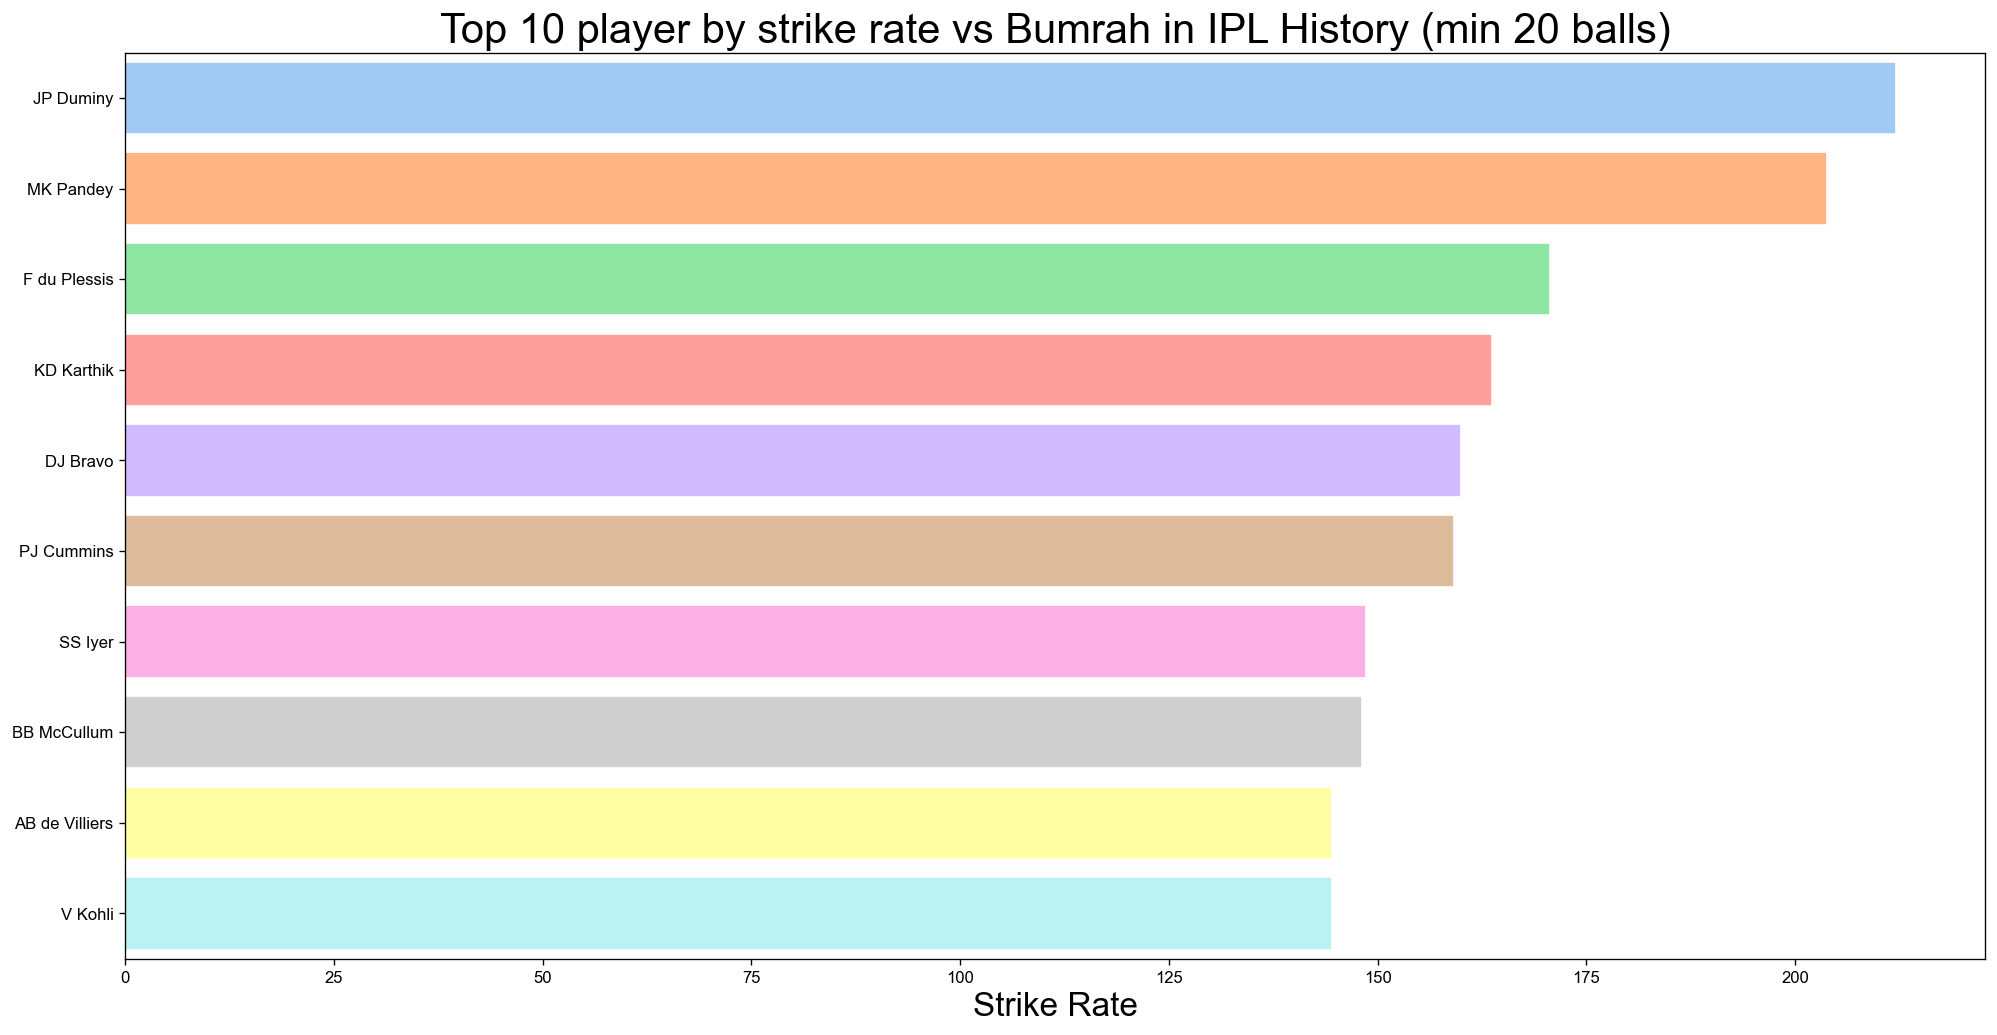

In [30]:
fig_dims = (20,10)
fig = plt.subplots(figsize = fig_dims,dpi = 120)
sns.set_theme(style='whitegrid', palette='pastel', font='sans-serif', font_scale=2)
plt.title('Top 10 player by strike rate vs Bumrah in IPL History (min 20 balls)',size = 25)
sns.barplot(x='strike_rate',y='striker',data = bdf3head,saturation=1)
plt.xlabel('Strike Rate',size = 20)
plt.ylabel('')
plt.show()

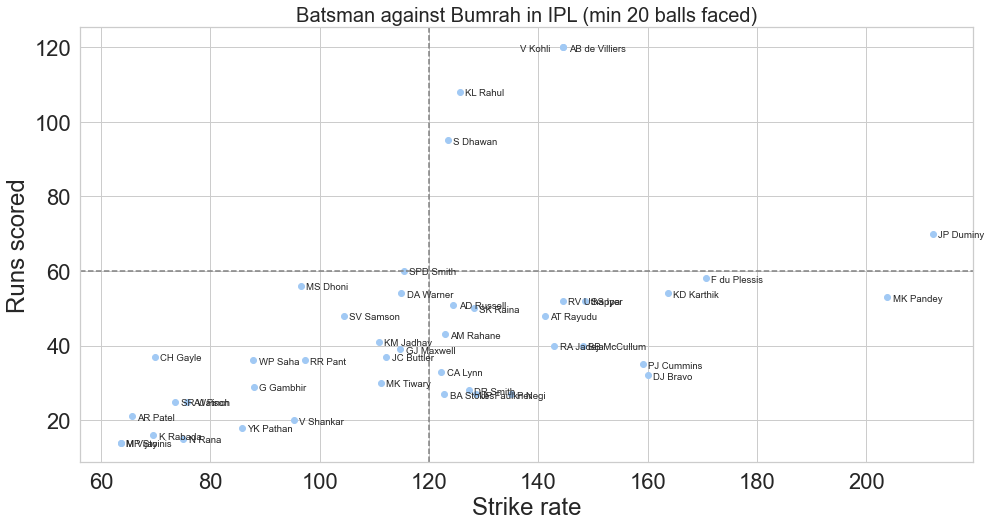

In [31]:
plt.figure(figsize = (16, 8))
plt.scatter(bdf3.strike_rate, bdf3.runs_off_bat)
sns.set_theme(style='white',palette='deep',font='sans-serif', font_scale=0.8)
for i in range(len(bdf3)):
#     plt.text(x, y, text)
    if bdf3['striker'][i] == 'V Kohli':
        plt.text(bdf3['strike_rate'][i] - 8, bdf3['runs_off_bat'][i] - 1, bdf3['striker'][i] )
    else:
        plt.text(bdf3['strike_rate'][i] + 1, bdf3['runs_off_bat'][i] - 1, bdf3['striker'][i] )

plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title('Batsman against Bumrah in IPL (min 20 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

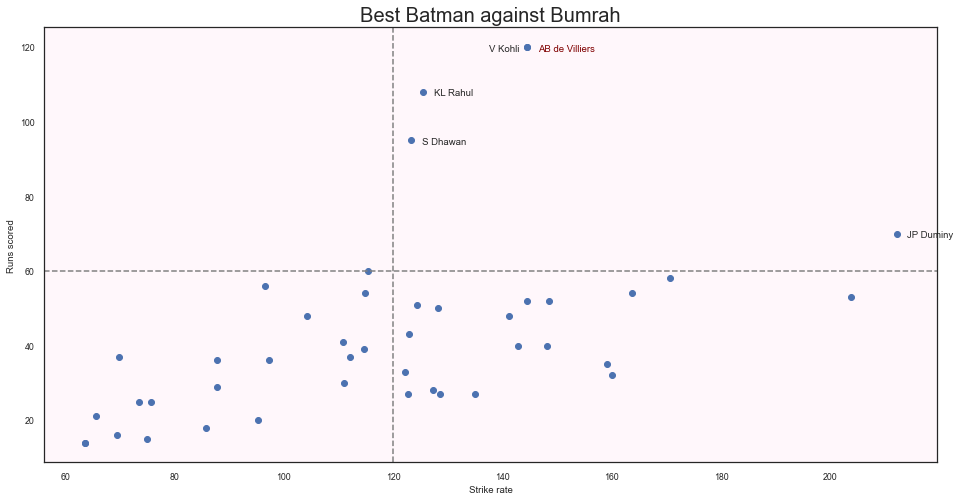

In [32]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(bdf3.strike_rate, bdf3.runs_off_bat)
sns.set_theme(style='white',palette='deep',font='sans-serif', font_scale=0.8)

for i in range(len(bdf3)):
    if bdf3.striker[i] == 'V Kohli':
        plt.text(bdf3.strike_rate[i] - 7, bdf3.runs_off_bat[i] - 1, bdf3.striker[i])
    elif bdf3.striker[i] == 'AB de Villiers':
        plt.text(bdf3.strike_rate[i] + 2, bdf3.runs_off_bat[i] - 1, bdf3.striker[i], color = 'maroon')
    elif (bdf3.striker[i] == 'S Dhawan') | (bdf3.striker[i] == 'KL Rahul') | (bdf3.striker[i] == 'JP Duminy'):
        plt.text(bdf3.strike_rate[i] + 2, bdf3.runs_off_bat[i] - 1, bdf3.striker[i])

plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title("Best Batman against Bumrah", fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

## ABD Visualization

In [33]:
adf3 = adf3.sort_values('strike_rate',ascending = True)
adf3.reset_index(inplace = True, drop = True)
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
0,R Vinay Kumar,16,20,80.00
1,JH Kallis,36,42,85.71
2,S Gopal,30,34,88.24
3,A Kumble,39,41,95.12
4,Rashid Khan,38,39,97.44


In [34]:
adf3.shape

(62, 4)

In [35]:
adf3head = adf3.head(10)
adf3head

,bowler,runs_off_bat,ball,strike_rate
0,R Vinay Kumar,16,20,80.00
1,JH Kallis,36,42,85.71
2,S Gopal,30,34,88.24
3,A Kumble,39,41,95.12
4,Rashid Khan,38,39,97.44
5,KV Sharma,29,29,100.00
6,PP Chawla,53,52,101.92
7,KH Pandya,51,49,104.08
8,KA Pollard,23,22,104.55
9,R Ashwin,59,56,105.36


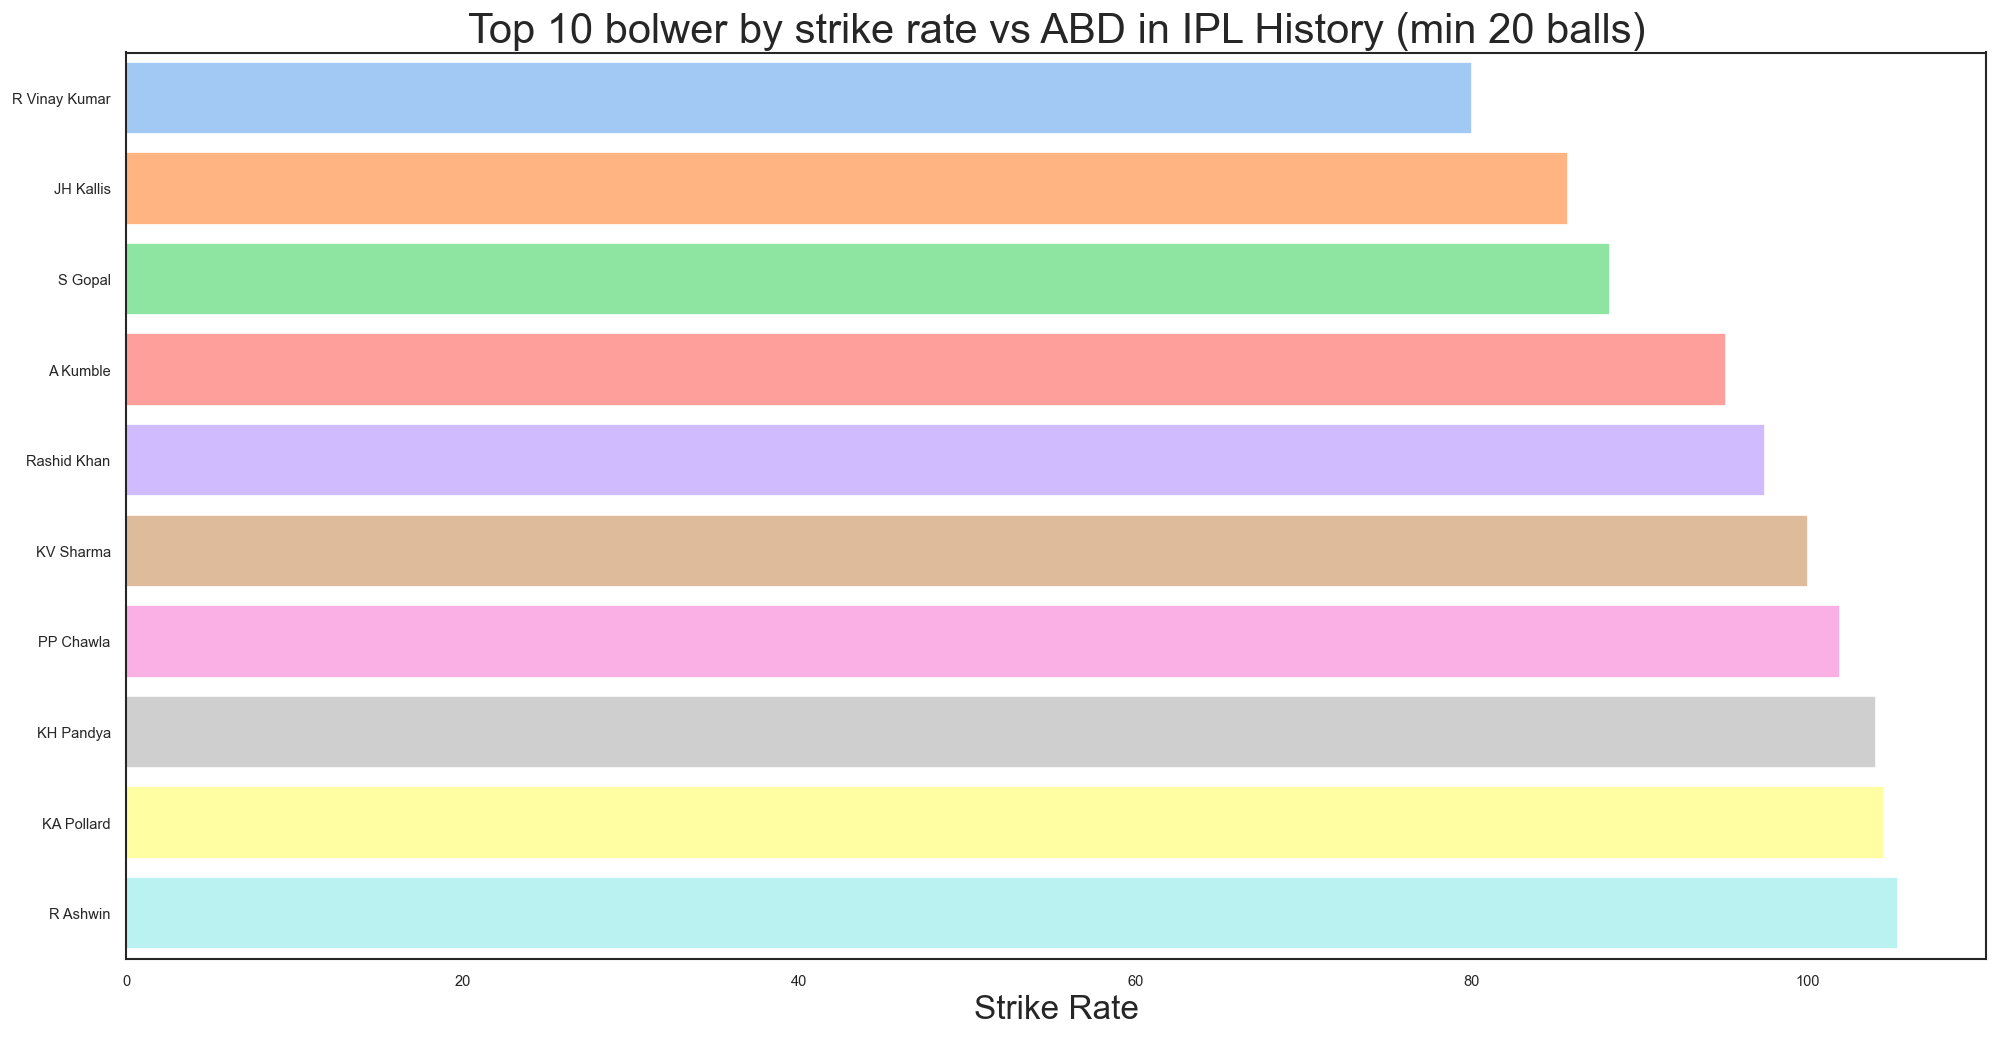

In [36]:
fig_dims = (20,10)
fig = plt.subplots(figsize = fig_dims,dpi = 120)
sns.set_theme(style='whitegrid', palette='pastel', font='sans-serif', font_scale=2)
plt.title('Top 10 bolwer by strike rate vs ABD in IPL History (min 20 balls)',size = 25)
sns.barplot(x='strike_rate',y='bowler',data = adf3head, saturation=1)
plt.xlabel('Strike Rate',size = 20)
plt.ylabel('')
plt.show()

In [37]:
adf3tail = adf3.tail(10)
adf3tail = adf3tail.sort_values('strike_rate',ascending = False)
adf3tail

,bowler,runs_off_bat,ball,strike_rate
61,TA Boult,55,21,261.90
60,MM Sharma,69,28,246.43
59,DW Steyn,55,23,239.13
58,HV Patel,53,23,230.43
57,AD Russell,87,38,228.95
56,S Kaul,48,21,228.57
55,HH Pandya,88,39,225.64
54,MJ McClenaghan,55,25,220.00
53,MP Stoinis,48,22,218.18
52,A Nehra,61,29,210.34


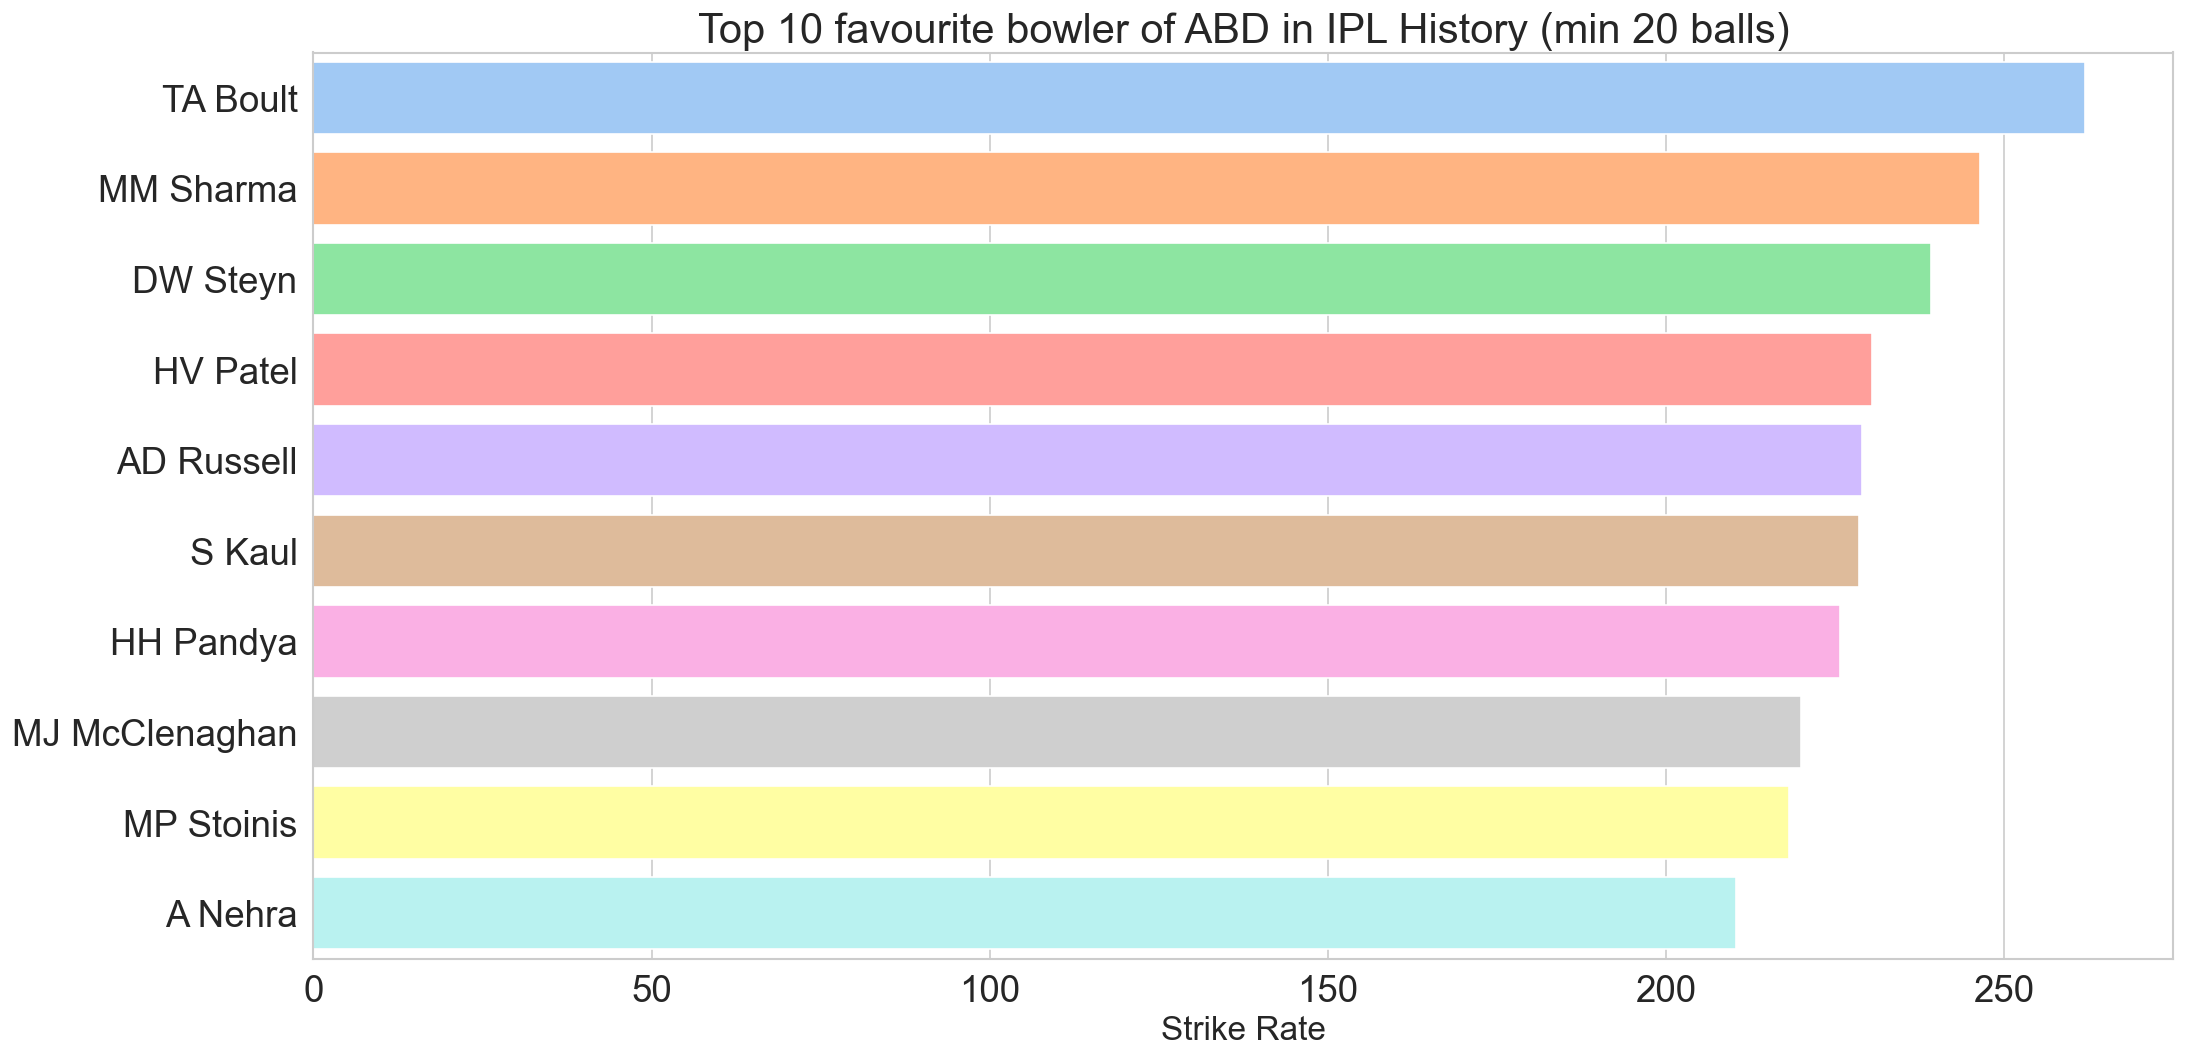

In [38]:
fig_dims = (20,10)
fig = plt.subplots(figsize = fig_dims,dpi = 120)
sns.set_theme(style='whitegrid', palette='pastel', font='sans-serif', font_scale=2)
plt.title('Top 10 favourite bowler of ABD in IPL History (min 20 balls)',size = 25)
sns.barplot(x='strike_rate',y='bowler',data = adf3tail, saturation=1)
plt.xlabel('Strike Rate',size = 20)
plt.ylabel('')
plt.show()

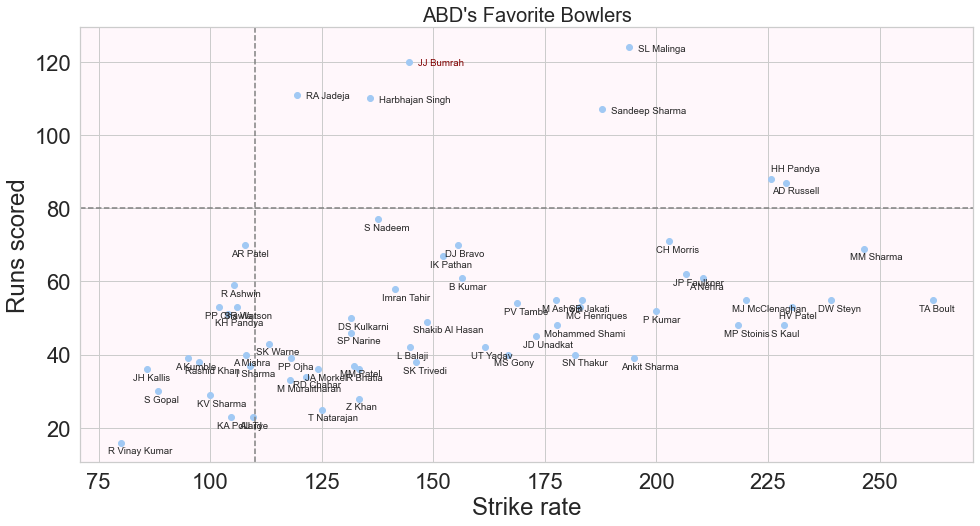

In [39]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(adf3.strike_rate, adf3.runs_off_bat)
sns.set_theme(style='white',palette='deep',font='sans-serif', font_scale=0.8)

for i in range(len(adf3)):
    if adf3.bowler[i] == 'JJ Bumrah':
        plt.text(adf3.strike_rate[i] + 2, adf3.runs_off_bat[i] - 1, adf3.bowler[i], color = 'maroon')
    elif (adf3.bowler[i] == 'RA Jadeja') | (adf3.bowler[i] == 'SL Malinga') | (adf3.bowler[i] == 'Sandeep Sharma') | (adf3.bowler[i] == 'Harbhajan Singh'):
        plt.text(adf3.strike_rate[i] + 2, adf3.runs_off_bat[i] - 1, adf3.bowler[i])
    elif (adf3.bowler[i] == 'HH Pandya'):
        plt.text(adf3.strike_rate[i], adf3.runs_off_bat[i] + 2, adf3.bowler[i])
    elif (adf3.bowler[i] == 'AD Russell'):
        plt.text(adf3.strike_rate[i] - 3, adf3.runs_off_bat[i] - 3, adf3.bowler[i])
    else :
        plt.text(adf3.strike_rate[i] - 3, adf3.runs_off_bat[i] - 3, adf3.bowler[i])

plt.axvline(110, ls = '--', color = 'grey')
plt.axhline(80, ls = '--', color = 'grey')
plt.title("ABD's Favorite Bowlers", fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

### So by looking at above charts it is clearly evident that ABD is dominating Bumrah so
## Winner of this battle is ABD